<a href="https://colab.research.google.com/github/crpytoscooby/College/blob/master/ML_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ML Assignment 5 - Association Rule Mining** 

Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
dataset=pd.read_csv("/content/Market_Basket_Optimisation.csv")

In [3]:
dataset.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(7500, 20)

Analyzing how many unique values are present in the dataset 

In [6]:
unique = dataset.nunique()
unique

shrimp               115
almonds              117
avocado              115
vegetables mix       114
green grapes         110
whole weat flour     106
yams                 102
cottage cheese        98
energy drink          88
tomato juice          80
low fat yogurt        66
green tea             50
honey                 42
salad                 28
mineral water         18
salmon                 7
antioxydant juice      2
frozen smoothie        2
spinach                2
olive oil              0
dtype: int64

Plotting the frequency plot

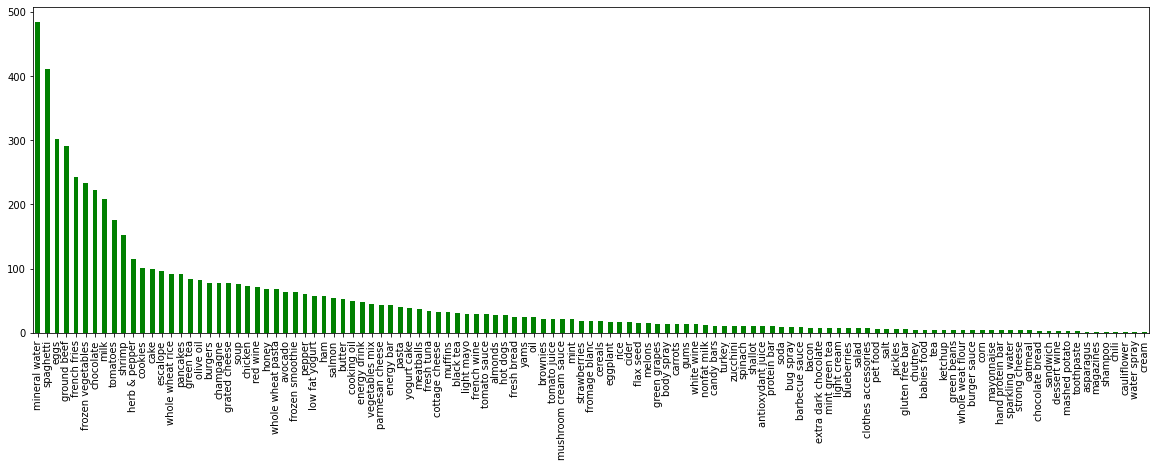

In [7]:
plt.rcParams['figure.figsize'] = (20,6)
dataset['almonds'].value_counts().plot.bar(color='g')
plt.show()

Appending the values in the list

In [8]:
transactions = []
for i in range(0,7500):
  transactions.append([str(dataset.values[i,j]) for j in range(0,20)])

Training the Apriori Model on the database

In [9]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=96a9a4b2255ea7749a9f166931e13d0a5e1ca4e46d4d9f23c299817064aeff12
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
from apyori import apriori
rules = apriori(transactions, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2)
rules

<generator object apriori at 0x7feb0f1e8e50>

Displaying the result

In [ ]:
result = list(rules)
result

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005866666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.700185158809287)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.0033333333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confiden

Visualizing the Rule, Support, Confidence and Shift

In [ ]:
for item in result:
  items = [x for x in item[0]]
  print('Rule: ' + items[0] + '->' + items[1])
  print('Support: ' + str(item[1]))
  print('Confidence: ' + str(item[2][0][2]))
  print('Lift: ' + str(item[2][0][3]))
  print()

Rule: chicken->light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844

Rule: escalope->mushroom cream sauce
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845

Rule: pasta->escalope
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287

Rule: fromage blanc->honey
Support: 0.0033333333333333335
Confidence: 0.2450980392156863
Lift: 5.178127589063795

Rule: herb & pepper->ground beef
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096

Rule: tomato sauce->ground beef
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528

Rule: light cream->olive oil
Support: 0.0032
Confidence: 0.20512820512820515
Lift: 3.120611639881417

Rule: whole wheat pasta->olive oil
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346

Rule: pasta->shrimp
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151

R